In [4]:
import intake
import xarray as xr
import matplotlib.pyplot as plt

In [56]:
models = [
    #{
    #    "name": "ocsvm-tq-gamma-1_79-nu-1e-4",
    #    "diags_url": "gs://vcm-ml-experiments/claytons/2022-07-20/tq-combined-nd-trial-2/trained_models/ocsvm/diags_novelty_offline/ccf08e12d6956ee2c0e922194eb95051/"
    #},
    #{
    #    "name": "ocsvm-tq-gamma-2_79-nu-1e-4",
    #    "diags_url": "gs://vcm-ml-experiments/claytons/2022-08-09/tq-combined-nd-trial-1/trained_models/ocsvm-large-gamma/diags_novelty_offline/ccf08e12d6956ee2c0e922194eb95051/"
    #},
    {
        "name": "ocsvm-tq-gamma-8_79-nu-4e-6",
        "diags_url": "gs://vcm-ml-experiments/claytons/2023-02-13/tq-additional-ocsvms-trial-3/trained_models/ocsvm-tq-gamma-8_79-nu-4e-6/diags_novelty_offline/ccf08e12d6956ee2c0e922194eb95051/"
    },
    {
        "name": "ocsvm-tq-gamma-4_79-nu-1e-4",
        "diags_url": "gs://vcm-ml-experiments/claytons/2022-08-09/tq-combined-nd-trial-1/trained_models/ocsvm-larger-gamma/diags_novelty_offline/ccf08e12d6956ee2c0e922194eb95051/"
    },
    {
        "name": "ocsvm-tq-gamma-1_79-nu-5e-3",
        "diags_url": "gs://vcm-ml-experiments/claytons/2023-02-08/tq-additional-ocsvms-trial-2/trained_models/ocsvm-tq-gamma-1_79-nu-5e-3/diags_novelty_offline/ccf08e12d6956ee2c0e922194eb95051/"
    },
    {
        "name": "ocsvm-tq-gamma-2_79-nu-5e-3",
        "diags_url": "gs://vcm-ml-experiments/claytons/2023-02-08/tq-additional-ocsvms-trial-2/trained_models/ocsvm-tq-gamma-2_79-nu-5e-3/diags_novelty_offline/ccf08e12d6956ee2c0e922194eb95051/"
    } 
]

In [57]:
diags = {}
for diags_ in models:
    diags[diags_['name']] = intake.open_zarr(diags_['diags_url']).to_dask()

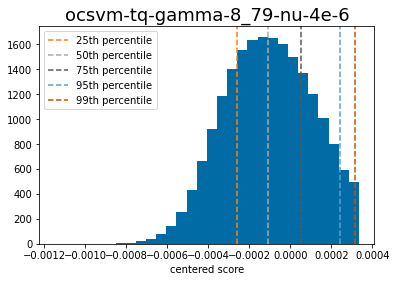

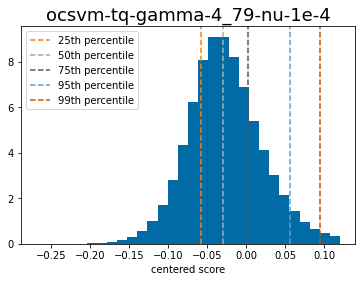

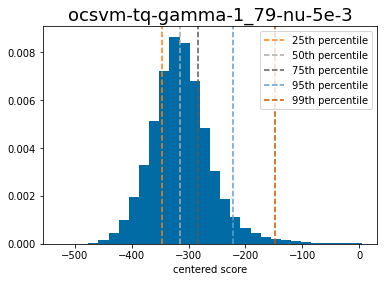

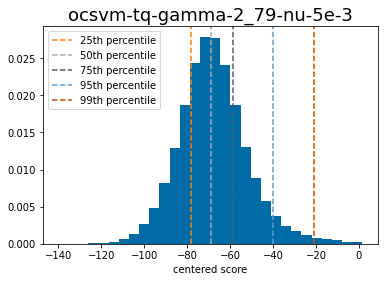

In [58]:
cutoffs_values = {}
percentiles = [25, 50, 75, 95, 99]

for label, diags_ in diags.items():
    #diags_ = diags['ocsvm-tq-gamma-1_79-nu-1e-4']
    scores = diags_["centered_score"].stack(sample=list(diags_.dims)).values
    plt.hist(scores, density=True, bins=30)
    ylim = plt.gca().get_ylim()
    cutoffs_values[label]= {}
    for p in percentiles:
        cutoff = np.percentile(scores, p)
        cutoffs_values[label][p] = cutoff 
        plt.plot([cutoff, cutoff], ylim, '--', label=f"{p}th percentile")
    plt.ylim(ylim)
    plt.xlabel('centered score')
    plt.title(label, fontsize=18)
    plt.legend()
    plt.show()

In [59]:
cutoffs_values

{'ocsvm-tq-gamma-8_79-nu-4e-6': {25: -0.00026226906950550745,
  50: -0.00010728440281770587,
  75: 5.2291015897946904e-05,
  95: 0.0002417489460279842,
  99: 0.000317759365535995},
 'ocsvm-tq-gamma-4_79-nu-1e-4': {25: -0.05815642218602085,
  50: -0.029850583020086682,
  75: 0.001679034380069104,
  95: 0.055424329177113624,
  99: 0.09498745937043893},
 'ocsvm-tq-gamma-1_79-nu-5e-3': {25: -346.2557534672875,
  50: -315.7363149825659,
  75: -283.4996468068749,
  95: -221.60332550794874,
  99: -147.79858918975268},
 'ocsvm-tq-gamma-2_79-nu-5e-3': {25: -78.05709508197667,
  50: -68.64619955860887,
  75: -58.717079361689734,
  95: -40.051143589287285,
  99: -20.72418722423168}}